In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [3]:
path = "https://raw.githubusercontent.com/Poojagarate/CodeClause_Gold_Price_Prediction/main/Gold_Price_Data.csv"
df = pd.read_csv(path)
df.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


**EDA**

---



In [4]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


FINDING MISSING VALUES

In [8]:
df.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [9]:
df.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
for col in df.columns:
    print(col, df[col].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [11]:
correlation = df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


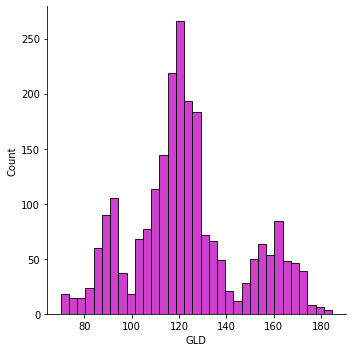

In [12]:
sns.displot(df['GLD'],color="m")


In [15]:
X = df[['SPX','USO','SLV','EUR/USD']]
x = X.iloc[:,:].values
y = df.iloc[:,2].values 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [21]:
y_predict = lr.predict(x_test)
y_predict

array([121.893539  , 142.52364868, 158.91453793, 114.2187805 ,
       110.36659025, 104.50331873, 109.98245681,  92.18483425,
       120.90649253, 123.318912  , 191.2074328 , 118.60055338,
       112.11950573,  93.46765189, 102.30779779,  97.98184003,
       118.85518215,  94.0029039 , 119.86781484, 116.59909644,
       122.21215189, 142.45378454, 121.22332281, 120.62860463,
       163.30049944, 104.70315921, 125.56912816,  87.10875178,
        95.73671386,  86.93309315, 121.81073623, 147.1233332 ,
       144.33048658, 121.95542705, 121.2464489 ,  94.5371824 ,
       152.31281012, 113.94185408, 110.92710898, 182.21152503,
        97.46373243, 128.50200625, 120.48416906, 140.20343573,
       120.16866258,  90.96452083,  82.43780029, 123.52782293,
       144.52004651, 113.76951398, 123.14800018, 159.28339044,
       141.34969761,  88.97598628, 163.39595336, 142.38892627,
       109.31495867, 119.81421995,  93.1108709 , 129.67869305,
       119.96744889, 142.21550112, 115.80809495, 115.07

In [20]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for linear reg is :', accuracy)

R-Squared Error for lr : 0.8696713120900417
